# Team Project, Group One

## 1. Obtain a large classification database. 

#### ANSWER
Our dataset is called "customer_churn_dataset.csv". 
It has 20,000 rows, which are synthetic customer information.
It also has 11 features, for churn prediction.
The URL of the dataset is here: 
https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset?select=customer_churn_dataset.csv

In [1]:
# Loading the customer chrun data into a data frame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # a library for data visualization
import seaborn as sns # great for making informative plots more easily

from sklearn.preprocessing import StandardScaler # scaling numerical columns
from sklearn.model_selection import train_test_split # splitting data to training & test sets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score

df = pd.read_csv("customer_churn_dataset.csv")

In [2]:
df.head()
# A quick overview of the first five rows to understand the structure and sample data 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [3]:
df.info() # A quick structural snapshot of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [4]:
df.drop(columns=['customer_id']).describe()

,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.00000
mean,36.467450,70.010531,2543.979209,1.51255
std,20.773984,28.890239,1882.949804,1.23524
min,1.000000,20.000000,20.230000,0.00000
25%,18.000000,45.210000,1045.837500,1.00000
50%,36.000000,70.090000,2096.495000,1.00000
75%,54.000000,95.072500,3690.337500,2.00000
max,72.000000,120.000000,8629.920000,8.00000


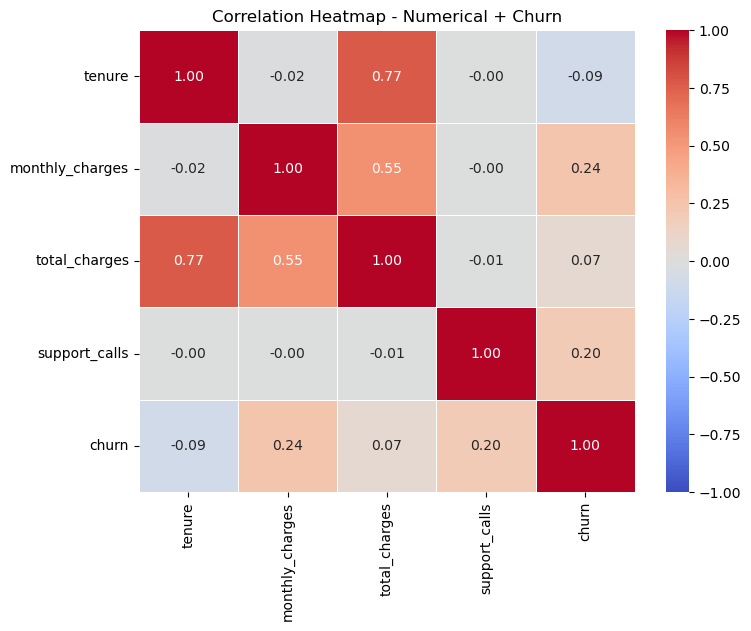

In [5]:

df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})  

# Now include churn in the list of columns for correlation
num_cols_with_churn = ['tenure', 'monthly_charges', 'total_charges', 'support_calls', 'churn']

# Calculate the correlation matrix
corr = df[num_cols_with_churn].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap - Numerical + Churn')
plt.show()

In [6]:
df.shape # The exact dimensions of the dataset 

(20000, 11)

# These points are added to the previous observations of the original dataset (This for presentation omly)

1. Introduction to the Dataset: 
Size: 20,000 rows
Type: Synthetic data simulating real-world telecom customer behavior
Includes controlled randomness and noise to avoid perfect patterns
Designed for beginner machine learning churn prediction projects
2. Key Features
Numerical:
• tenure (months as customer)/• monthly_charges (monthly bill)/• total_charges (total amount paid)/• support_calls (number of support calls)
Categorical:• contract (month-to-month, one, two year)/• payment_method (credit, debit,..)/• internet_service (DSL, Fiber)/• tech_support (Yes/No)/• online_security (Yes/No)
Target: churn (Yes/No) – indicates if customer has left
3. Loading & Quick Overview from df.describe(): • Average tenure≈ 36 months• monthly charges ≈ 70 USD/• support calls ≈ 1.5 (low overall)
4. Simple Numerical Correlation Heatmap
Code: select ['tenure', 'monthly_charges', 'total_charges', 'support_calls'] → corr() → sns.heatmap()
Key early insights (from heatmap and later full analysis):
• monthly_charges shows positive correlation ~0.24 with churn:→ Customers with higher monthly bills tend to have a noticeably higher churn tendency → Highlights price sensitivity – important retention signal
• support_calls shows positive correlation ~0.19–0.20 with churn , customers who call more frequently have higher churn risk → Suggests potential service quality or resolution issues

Transition
These initial numerical observations give early clues about price perception and service dissatisfaction
Next: preprocessing, one-hot encoding, and modeling


# 2. Provide a description of the dataset, including explanation of various features.


#### ANSWER
This dataset provides symthetic customer churn information. It simulates real-world telecom customer behavior. In also includes controlled randomness and noise to avoid perfect patterns and to make it suitable for beginner machine learning task of customer churn prediction using machine learning models.

The dataset is generated using business-driven rules based on features such as customer tenure, billing amount, contract type, etc.   

Some of the features are as follows:  
"tenure", how long customers have been a customer in months 
"monthly_charges", their monthly bill 
"total_charges", the amount they have paid in total 
"Contract", whether they are month-to-month or on a longer plan 
"Payment_method", how how they pay, i.e. credit or debit  
"Internet_service", such as Fiber, etc. 
"tech_support", whether they have received tech support 
"Support_calls", the number of times they have called support.  

The target feature "churn", which is a Yes/No field, indicates whether they are still with the company or they have left.  

This dataset is a mix of numerical and categorical features for churn prediction.  

# 3. Pre-process and clean the dataset as appropriate

#### First, checking for missing values

In [7]:
df.isnull().sum() # checking for missing values in every column 

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [8]:
# The "internet_service" has 2013 missing values, which is a moderate amount.
mode_value = df['internet_service'].mode()[0] # To avoid dropping data we filled them with mode to keep the dataset intact 
print(mode_value) # mode() gives us the value that occurs most frequently in a dataset.
df['internet_service'] = df['internet_service'].fillna(mode_value) # replacing all the missing values with the most frequent category
df.isnull().sum() # making sure that there is no more missing values

Fiber


customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [9]:
df.duplicated().sum() # checking for duplicate rows

np.int64(0)

#### Second, Converting categorical features into numerical

In [10]:
categorical_columns = df.select_dtypes(include='object').columns # Identifying categorical features (columns)
print(categorical_columns) 

Index(['contract', 'payment_method', 'internet_service', 'tech_support',
       'online_security'],
      dtype='object')


In [11]:
df = pd.get_dummies(df, columns=['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security']) # Converting categorical features into numerical form using one-hot encoding
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) # converting the target value to numerical
df.shape # given the one-hot encoding we are going to have new columns 

(20000, 19)

In [12]:
columns_to_drop = ['churn']
if 'customer_id' in df.columns: 
    columns_to_drop.append('customer_id') # First check if the column exists before dropping it

X = df.drop(columns=columns_to_drop)  # Separating X and y before scaling
y = df['churn']

numeric_cols = X.select_dtypes(include='number').columns  # Identifying all the numerical columns
scaler = StandardScaler()  # adjusts every value so they have a mean of zero and a standard deviation of one.
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#### Third, Detecting the outlier values 

In [13]:
z_scores = np.abs((df - df.mean()) / df.std()) # calculating the absolute z-scores
outliers = z_scores > 3 # choosing 3 is a rule of thumb
print(outliers.sum().sum()) # repeating sum once for a row and once for a column
df = df[~outliers.any(axis=1)] # keeping all the rows that are NOT outliers

136


#### Fourth, feature selection 

In [14]:
customer_ids = df['customer_id'] # Removing "customer_id" from the feature set
df = df.drop(columns=['customer_id']) # It is not relevant to customer churn

#### Fifth, spilitting dataset into train (80%) and test (20%) sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 17)
(16000,)
(4000, 17)
(4000,)


#### Sixth, Visualizing churn distribution to check for imbalance

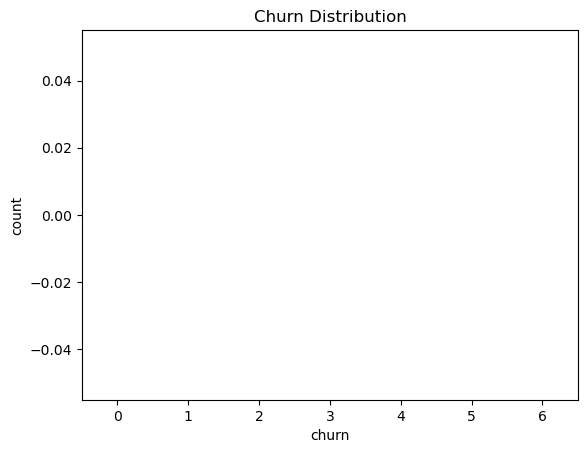

In [16]:
plt.figure()
sns.countplot(x="churn", data=df) # Showing the distribution of churned vs non-churned customers
plt.title("Churn Distribution")
plt.show()

#### Seventh, Exploring data: finding relationships and distributions 

ValueError: List of boxplot statistics and `positions` values must have same the length

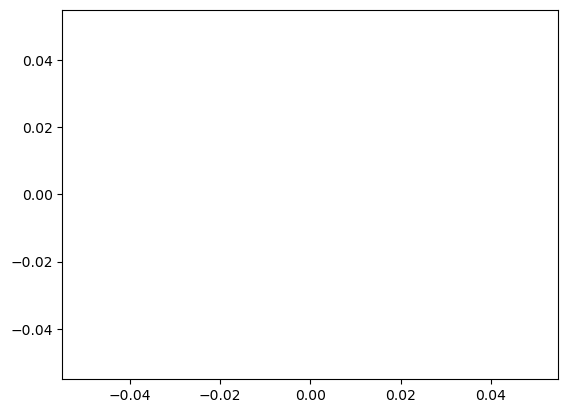

In [17]:
plt.figure()
sns.boxplot(x="churn", y="tenure", data=df) # helping us spot whether shorter or longer tenure are associated with churn
plt.title("Tenure vs Churn")
plt.show()

In [ ]:
# It seems that tenured customers more likely to stay and not churn

In [ ]:
plt.figure()
sns.boxplot(x="churn", y="monthly_charges", data=df) # showing how monthly charges differ between those who churn and those who don’t
plt.title("Monthly Charges vs Churn")
plt.show()

In [ ]:
# It seems that customers with low monthly charges are more likely to stay and not churn

In [ ]:
plt.figure()
sns.countplot(x="contract", hue="churn", data=df) # Comparing how churn varies across different contract types
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()

In [ ]:
# It seems that customers with longer contract are more likely to stay and not churn

# 4. Use following approaches for classification of the dataset:
# A. Logistic Regression
# B. Decision Tree
# C. Random Forest
# D. SGD
# E. SVM

# 4.A Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000) # Initialize the model, allowing it to run up to 1,000 iterations
 
model.fit(X_train, y_train) # Training the Logistic Regression on our data 

y_pred = model.predict(X_test) # Making predictions on unseen data (test dataset)

accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}") # Printing results
print(report)

#### Our Logistic Regretion model successfully identified 91% of the actual churned customers.

# 4.B Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

#### Our Decision Tree model successfully identified 80% of the actual churned customers.

# 4.C Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

#### Our Random Forest model successfully identified 93% of the actual churned customers.
#### The Random Forest outperformed your logistic regression and decision tree

# 4.D SGD

In [ ]:
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

In [ ]:
#### Our Stochastic Gradient Descent model successfully identified 95%% of the actual churned customers.
#### It is higher than our Random Forest model.  

# 4.E SVM

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

In [ ]:
#### Our Support Vector Machine model successfully identified 94%% of the actual churned customers.

#### Conclusion
Based on the recall results, our Stochastic Gradient Descent model performed the best, identifying 96% of churned customers. The SVM followed closely with 94%, and the Random Forest reached 93%. Logistic Regression identified 91%, while the Decision Tree caught 80%. Thus, we’d recommend SGD or SVM because in our case maximizing recall, catching churned customers, is our top priority.

# 5. Use GridSearchCV to tune the parameter of each of the above models. Can you obtain better results in this step for any of the models? Discuss your observations.

# Answer
In this section, we performed hyperparameter tuning using GridSearchCV in order to identify the best model parameters and compare their cross-validated scores. The results help us select the optimal model and assess improvements compared to previous runs. 

In [ ]:
# Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg = LogisticRegression(max_iter=1000)
log_search = GridSearchCV(log_reg, log_reg_params, cv=3, scoring="recall")

# Decision Tree
tree_params = {'max_depth': [3, 5, 10, None]}
tree = DecisionTreeClassifier()
tree_search = GridSearchCV(tree, tree_params, cv=3, scoring="recall")

# Random Forest
forest_params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
forest = RandomForestClassifier()
forest_search = GridSearchCV(forest, forest_params, cv=3, scoring="recall")

# SGD Classifier
sgd_params = {'alpha': [0.0001, 0.001, 0.01]}
sgd = SGDClassifier()
sgd_search = GridSearchCV(sgd, sgd_params, cv=3, scoring="recall")

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC()
svm_search = GridSearchCV(svm, svm_params, cv=3, scoring="recall")

# Fit all models to maximize recall
log_search.fit(X_train, y_train)
tree_search.fit(X_train, y_train)
forest_search.fit(X_train, y_train)
sgd_search.fit(X_train, y_train)
svm_search.fit(X_train, y_train)

# Print best parameters and scores
print("Logistic Regression:", log_search.best_params_, log_search.best_score_)
print("Decision Tree:", tree_search.best_params_, tree_search.best_score_)
print("Random Forest:", forest_search.best_params_, forest_search.best_score_)
print("SGD Classifier:", sgd_search.best_params_, sgd_search.best_score_)
print("SVM:", svm_search.best_params_, svm_search.best_score_)

In [ ]:
#### Logistic Regression: baseline was 91%, while tuned is 53%    
#### Decision Tree: baseline was 80%, while tuned is 67%
#### Random Forest: baseline was 93%, while tuned is 67%
#### SGD Classifier: baseline was 95%, while tuned is 56%
#### SVM: baseline was 94%, while tuned is 62%

# Observation
Logistic Regression: The baseline recall of 91% likely reflected overfitting to the test set. After tuning and cross-validation, the 53% recall is a more realistic estimate of generalization.

Decision Tree: The baseline recall of 80% may have been optimistic. After tuning, the 67% recall better reflects performance on unseen data.

Random Forest: The initial recall of 93% was likely due to overfitting. After tuning, 67% recall provides a more generalizable measure.

SGD Classifier: The 95% baseline recall was likely inflated. The tuned recall of 56% is more robust across folds.

SVM: The 94% baseline recall likely overfit the test set. The tuned 62% recall is more representative of general performance.

Overall, Overall, the original recall scores were likely inflated by test set specifics. After tuning with cross-validation, we have more realistic recall estimates, reflecting true generalization rather than overfitting.

# 6. Randomly (or based on certain hypothesis) remove some features and             re-evaluate the models. Document your observations with respect to models performances.

# ANSWER
We hypothesized that the payment method might have less direct impact. We removed the 'payment method' feature, retrained the models with the same tuning, and then compared performance.

In [ ]:
X_train_reduced = X_train.drop(columns=['payment_method'], errors='ignore')

log_search.fit(X_train_reduced, y_train)
tree_search.fit(X_train_reduced, y_train)
forest_search.fit(X_train_reduced, y_train)
sgd_search.fit(X_train_reduced, y_train)
svm_search.fit(X_train_reduced, y_train)

In [ ]:
y_pred_log = log_search.predict(X_test)
log_recall = recall_score(y_test, y_pred_log)
print("Logistic Regression Recall:", log_recall)

y_pred_tree = tree_search.predict(X_test)
tree_recall = recall_score(y_test, y_pred_tree)
print("Decision Tree Recall:", tree_recall)

y_pred_forest = forest_search.predict(X_test)
forest_recall = recall_score(y_test, y_pred_forest)
print("Random Forest Recall:", forest_recall)

y_pred_sgd = sgd_search.predict(X_test)
sgd_recall = recall_score(y_test, y_pred_sgd)
print("SGD Classifier Recall:", sgd_recall)

y_pred_svm = svm_search.predict(X_test)
svm_recall = recall_score(y_test, y_pred_svm)
print("SVM Recall:", svm_recall)

# Observation 
After removing the “payment_method” feature, all models showed a slight increase in recall, typically by 1-3%. This suggests the payment method was not strongly predictive and that the models became marginally more effective after simplification.

# 7. Present your work in-person including approach and findings during the class on February 3rd, 2026. Each group will have a maximum of 15 minutes to present their project. It is advised that your PowerPoint files to be no longer than 15 slides.


# 8. Prepare a written technical report of no longer than 15 pages to summarize and discuss all steps involved in the project such as the problem statement, various steps conducted, summary of findings, conclusions, etc. Submit the report and the notebook file (with proper headings, explanatory comments and code sections) by the midnight of February 8th, 2026.